Loading Sample Data Using Pandas

In [1]:
import pandas as pd
df = pd.read_csv("Sample_Data.csv")

# To verify that the data has been loaded correctly and to get an initial overview of the columns and values.
print(df.head())

# Structure of the dataset in the form (number of rows, number of columns).
print("Shape of sample data" , df.shape)

# Summary of the DataFrame including the data types and non-null values.
print(df.info())

   Values            Timestamp
0     100  26-06-2024 06:17:55
1     100  26-06-2024 06:18:11
2     100  26-06-2024 06:18:28
3     100  26-06-2024 06:18:45
4     100  26-06-2024 06:19:00
Shape of sample data (21919, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21919 entries, 0 to 21918
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Values     21919 non-null  int64 
 1   Timestamp  21919 non-null  object
dtypes: int64(1), object(1)
memory usage: 342.6+ KB
None


Plotting Sample Data for analysis

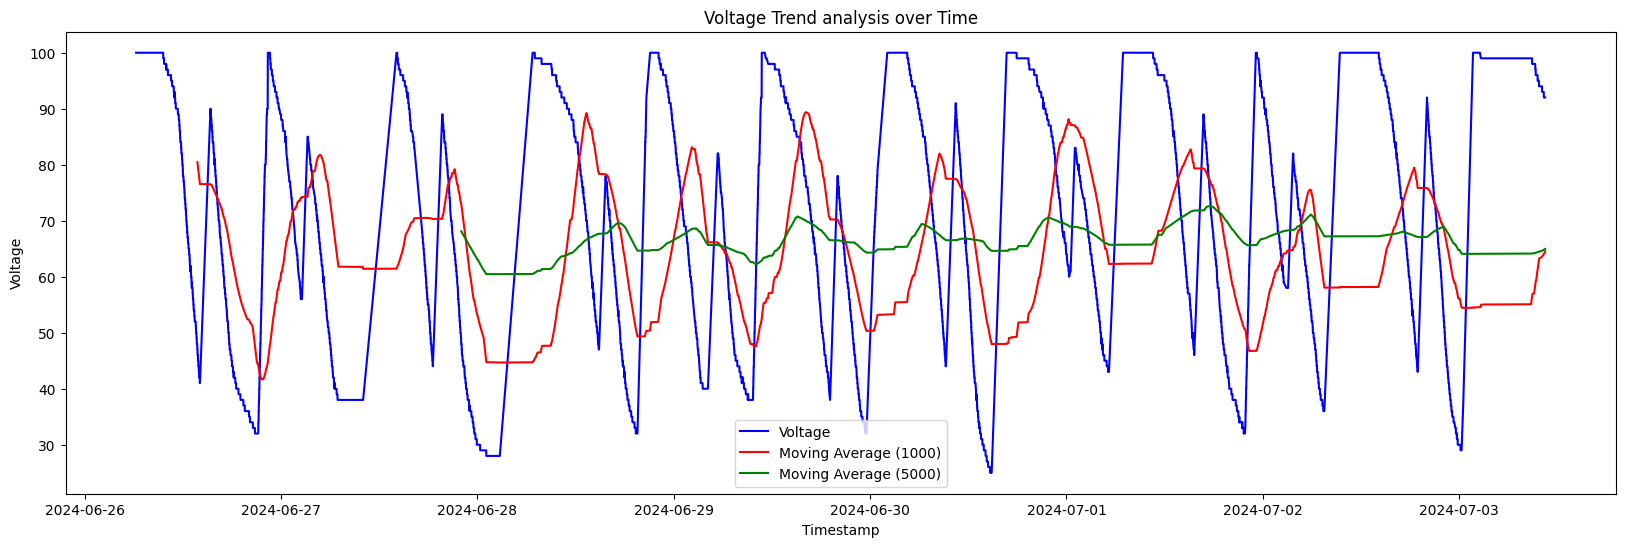

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt

# Converting 'Timestamp' column to datetime format for accurate plotting
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(20,6))

# Plotting the 'Values' column against 'Timestamp'
plt.plot(df['Timestamp'], df['Values'] , color='blue')

# Calculating and plotting moving averages for smoothing the data
df['MovingAverage(1000)'] = df['Values'].rolling(window=1000).mean()
plt.plot(df['Timestamp'], df['MovingAverage(1000)'] , color='red')
df['MovingAverage(5000)'] = df['Values'].rolling(window=5000).mean()
plt.plot(df['Timestamp'], df['MovingAverage(5000)'] , color='green')

plt.xlabel("Timestamp")
plt.ylabel("Voltage")
plt.title("Voltage Trend analysis over Time")
plt.legend(["Voltage", "Moving Average (1000)", "Moving Average (5000)"])
plt.show()
plt.tight_layout()

5 Day Moving Average on the plot

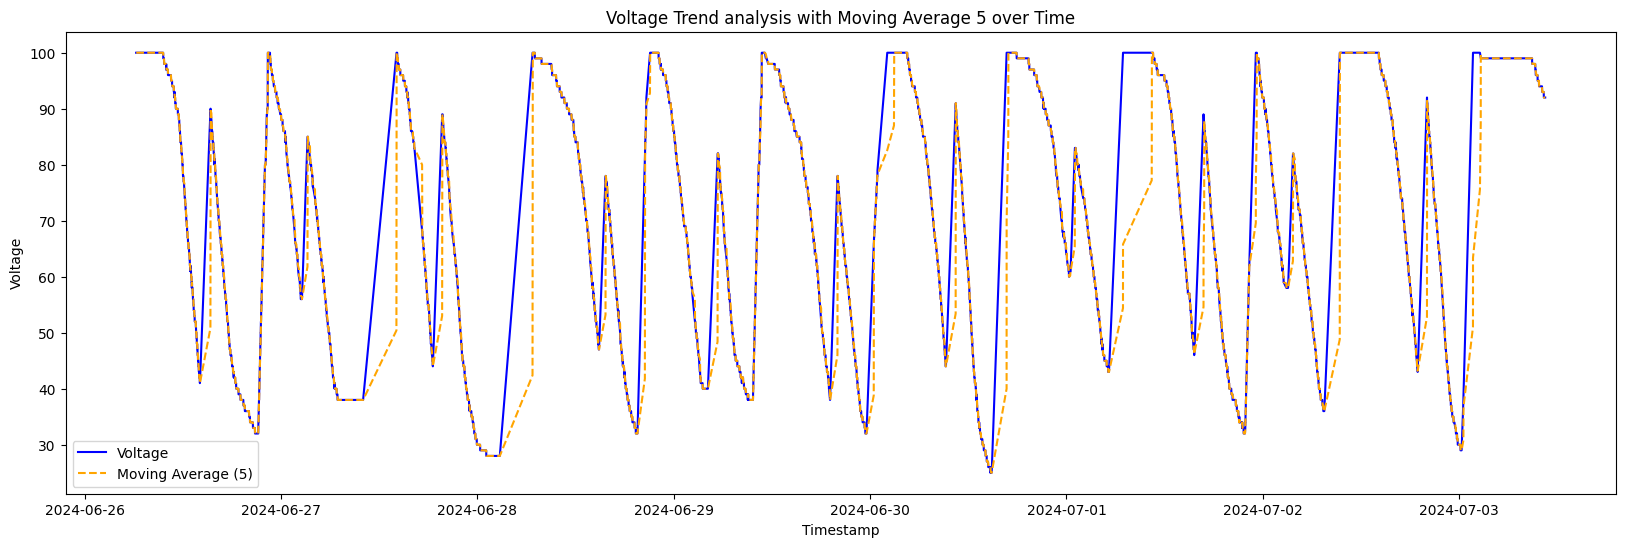

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(20,6))

# Plotting the 'Values' column against 'Timestamp'
plt.plot(df['Timestamp'], df['Values'] , color='blue')

# Calculating and plotting moving average 5 with a smaller window for finer smoothing
df['MovingAverage(5)'] = df['Values'].rolling(window=5).mean()
plt.plot(df['Timestamp'], df['MovingAverage(5)'] , color='orange' , linestyle='--')

plt.xlabel("Timestamp")
plt.ylabel("Voltage")
plt.title("Voltage Trend analysis with Moving Average 5 over Time")
plt.legend(["Voltage", "Moving Average (5)"])
plt.show()
plt.tight_layout()

Finding local peaks and lows of data

In [8]:
from scipy.signal import find_peaks

# Local peaks
peaks, _ = find_peaks(df['Values'])

# Local lows (invert signal)
lows, _ = find_peaks(-df['Values'])

peaks_df = df.iloc[peaks][['Timestamp', 'Values']]
lows_df = df.iloc[lows][['Timestamp', 'Values']]

print("Local Peaks:")
print(peaks_df)

print("\nLocal Lows:")
print(lows_df)

Local Peaks:
                Timestamp  Values
122   2024-06-26 09:57:56      98
361   2024-06-26 10:58:57      93
557   2024-06-26 11:49:49      83
603   2024-06-26 12:01:22      79
798   2024-06-26 12:55:48      62
...                   ...     ...
21422 2024-07-02 23:18:22      35
21484 2024-07-02 23:43:44      32
21505 2024-07-02 23:49:13      31
21543 2024-07-03 00:09:26      30
21579 2024-07-03 01:41:20     100

[109 rows x 2 columns]

Local Lows:
                Timestamp  Values
120   2024-06-26 09:57:38      97
360   2024-06-26 10:58:56      92
556   2024-06-26 11:49:32      82
602   2024-06-26 12:01:06      78
795   2024-06-26 12:55:00      61
...                   ...     ...
21421 2024-07-02 23:18:04      34
21482 2024-07-02 23:43:27      31
21504 2024-07-02 23:48:57      30
21542 2024-07-03 00:09:09      29
21558 2024-07-03 00:13:15      29

[109 rows x 2 columns]


Instances when voltage went below 20

In [9]:
low_voltage_df = df[df['Values'] < 20][['Timestamp', 'Values']]

print("Voltage below 20:")
print(low_voltage_df)


Voltage below 20:
Empty DataFrame
Columns: [Timestamp, Values]
Index: []


Instance where the downward slope accelerates in each downward cycle.

In [10]:
import numpy as np

# Calculating slope and acceleration
df['slope'] = np.gradient(df['Values'])
df['acceleration'] = np.gradient(df['slope'])

accelerating_down = df[(df['slope'] < 0) & (df['acceleration'] < 0)]

print("Timestamps where downward slope accelerates:")
print(accelerating_down[['Timestamp', 'Values', 'slope', 'acceleration']])


Timestamps where downward slope accelerates:
                Timestamp  Values  slope  acceleration
35    2024-06-26 09:36:14     100   -0.5         -0.25
59    2024-06-26 09:42:16      99   -0.5         -0.25
124   2024-06-26 09:58:30      98   -0.5         -0.25
173   2024-06-26 10:10:52      97   -0.5         -0.25
260   2024-06-26 10:33:23      96   -0.5         -0.25
...                   ...     ...    ...           ...
21686 2024-07-03 09:20:57      97   -0.5         -0.25
21731 2024-07-03 09:34:39      96   -0.5         -0.25
21768 2024-07-03 09:44:32      95   -0.5         -0.25
21830 2024-07-03 10:07:21      94   -0.5         -0.25
21876 2024-07-03 10:20:01      93   -0.5         -0.25

[1073 rows x 4 columns]
